# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,5

---
# 2. import dataset

In [4]:
df = pd.read_csv('clean.csv')
df.shape

(4293, 96)

In [5]:
df1 = df.drop('Classification', axis=1)
scaler = StandardScaler()
df2 = pd.DataFrame(scaler.fit_transform(df1))
df2.shape

(4293, 95)

---
# 3. impute with mean

In [6]:
df2 = df2.fillna(df2.mean())
df3 = df2.describe().transpose()
df3.to_csv('describe.csv', index=False)

In [7]:
df4 = df3[df3['std']==0]
df2 = df2.drop([28,33,40], axis=1)
df2.shape

(4293, 92)

---
# 4. pca

In [8]:
model = PCA(random_state=42).fit(df2)

Text(0, 0.5, 'variance')

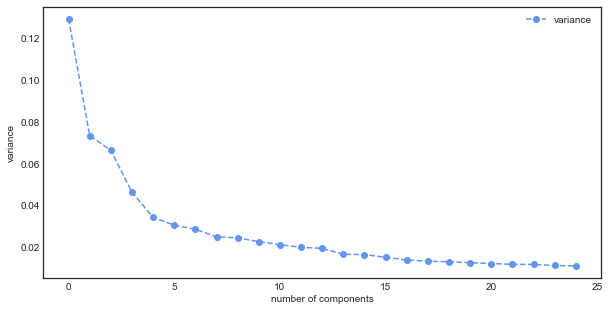

In [9]:
plt.plot(model.explained_variance_ratio_[0:25], linestyle='--', marker='o', color='cornflowerblue', label = 'variance')
plt.legend(loc = 'best')
plt.xlabel('number of components')
plt.ylabel('variance')

---
# 5. export dataset

In [10]:
model = PCA(n_components=12, random_state = 42).fit(df2)
components = model.transform(df2)
components = pd.DataFrame(components, columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'])

In [11]:
df3 = pd.concat([components, df], axis = 1)
df3 = df3[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'Classification']]
df3.to_csv('clean.csv', index=False)
df3.shape

(4293, 13)